<a href="https://colab.research.google.com/github/robertowainsmith/GoogleCollab/blob/main/basic_opendrift_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook to setup OpenDrift (https://opendrift.github.io/) in Google Collab and run a basic simulation
#
# R Smith (robert.smith@otago.ac.nz / https://twitter.com/robowainsmith / https://github.com/robertowainsmith)
# Last updated: 29-08-2023

In [1]:
#Install conda colab
!pip install -q condacolab
import condacolab
condacolab.install()
# (wait for kernel to restart, then proceed)

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
#clone the github version of opendrift
import condacolab
!git clone https://github.com/OpenDrift/opendrift.git
%cd opendrift
!mamba env update -n base -f environment.yml
!mamba init
!mamba activate base
!pip install --no-deps -e .

Cloning into 'opendrift'...
remote: Enumerating objects: 20596, done.
remote: Counting objects: 100% (850/850), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 20596 (delta 549), reused 718 (delta 509), pack-reused 19746
Receiving objects: 100% (20596/20596), 49.52 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (15251/15251), done.
/content/opendrift
[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.8s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.9s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.1s
conda

07:33:38 INFO    opendrift.models.basemodel:539: OpenDriftSimulation initialised (version 1.10.7 / v1.10.6-119-g1da5bec)
07:33:38 INFO    opendrift.models.oceandrift:346: Setting config: drift:vertical_advection -> False
07:33:38 INFO    opendrift.models.oceandrift:346: Setting config: drift:vertical_mixing -> False
07:33:38 INFO    opendrift.models.basemodel:2591: Fallback values will be used for the following variables which have no readers: 
07:33:38 INFO    opendrift.models.basemodel:2594: 	x_sea_water_velocity: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	y_sea_water_velocity: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	x_wind: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	y_wind: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	upward_sea_water_velocity: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	ocean_vertical_diffusivity: 0.000000
07:33:38 INFO    opendrift.models.basemodel:2594: 	sea_surface_wave_signific

0.9128345689654023 ALPHA


07:35:11 INFO    opendrift.models.basemodel:4533: Time to make plot: 0:00:04.254972


(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-09-10 07:33 to 2023-09-12 07:33 UTC (49 steps)'}>,
 <Figure size 559.938x1100 with 1 Axes>)

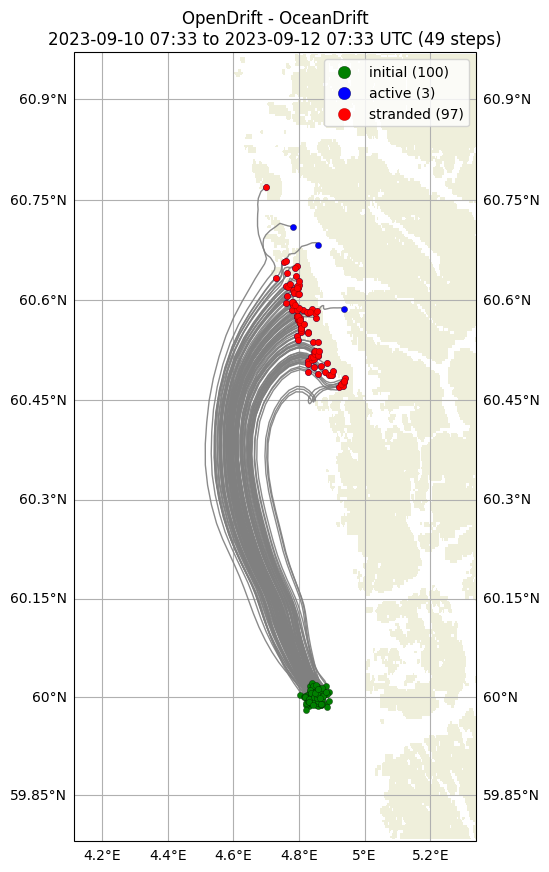

In [5]:
# OpenDrift basic example from https://opendrift.github.io/gallery/example_plot.html

from datetime import datetime, timedelta
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)
o.add_readers_from_list(
    ['https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be'])
o.disable_vertical_motion()
o.seed_elements(lon=4.85, lat=60, time=datetime.now(), number=100, radius=1000)

o.run(duration=timedelta(hours=48))
o.animation(fast="True",filename='animation.mp4')
o.plot(fast="True",filename='plot.png')